/tmp/ipython-input-14-2875213660.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


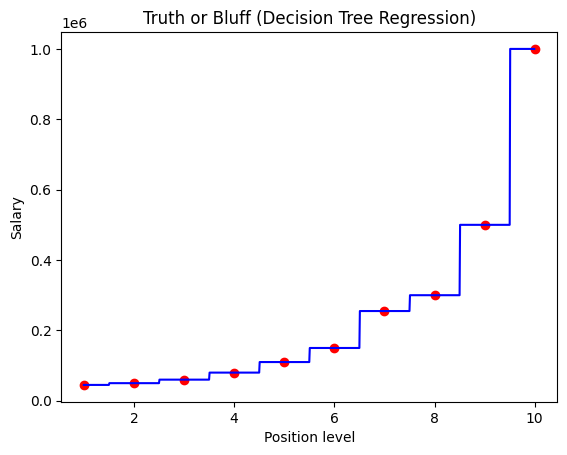

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing neccessary datasets
dataset = pd.read_csv("Complex_Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values
z = dataset.iloc[:, 2:4].values

#fixing missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(z[:, 1:2])
z[:, 1:2] = imputer.transform(z[:, 1:2])

imputer.fit(z[:, 0:1])
z[:, 0:1] = imputer.transform(z[:, 0:1])

y = y.reshape(-1, 1)
imputer.fit(y)
y = imputer.transform(y)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

regressor.predict([[6.5]])

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()